In [1]:
basedir = '/home/abhinavgupta0110/NeuralODEs_ROM_Closure'

import os

is_google_colab = False

### Mount the Google drive if needed

In [2]:
if is_google_colab:
    from google.colab import drive
    drive.mount('/content/drive')
    
    %pip install quadpy

os.chdir(os.path.join(basedir, 'neuralClosureModels'))

In [3]:
from src.solvers.neuralDistDDE_with_adjoint_accel import history

import sys
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from IPython.core.debugger import set_trace

In [4]:
os.chdir(basedir)

In [5]:
# save_dir = 'Analysis/Bio_Eqn/compare_loss_nODE-C25-C26'
# save_dir = 'Analysis/Bio_Eqn/compare_loss_nODE-C25_nDDE-RNN-C6_nDistDDE-C7'
# save_dir = 'Analysis/Bio_Eqn/compare_loss_nODE-C26_nDistDDE-C8-C9-C10-C11'
# save_dir = 'Analysis/Bio_Eqn/compare_loss_nDistDDE-C10-C12_nDDE-C7'
save_dir = 'Analysis/Bio_Eqn/final_paper_results'

In [6]:
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

In [7]:
class args:
    def __init__(self, model_dir):
        self.model_dir = model_dir

In [8]:
class loss_plot:

    def __init__(self, figsave_dir):
        self.figsave_dir = figsave_dir
        self.fig = plt.figure(figsize=(6, 4), facecolor='white')
        self.ax = self.fig.add_subplot(111)
        self.colors = ['b', 'g', 'r', 'k', 'c', 'm']
        self.ax.cla()
        self.ax.set_title('Training Loss', fontsize=14)
        self.ax.set_xlabel('Epoch', fontsize=14)
        self.ax.set_ylabel('Time-Averaged $L_2$ Error', fontsize=14)
        self.max_epoch = 1
        self.max_loss = 0.0000001
        self.min_loss = 100
        self.itr = 0

    def add_plot_loss(self, model_dir, legend_name):

        loss_history = history(args(model_dir))
        loss_history.read()
        self.max_epoch = max(self.max_epoch, max(loss_history.epoch))
        self.max_loss = max(self.max_loss, loss_history.train_loss[0])
        self.min_loss = min(self.min_loss, min(loss_history.train_loss))
#         self.ax.set_xlim(0, self.max_epoch)
        self.ax.set_xlim(0, 200)
        self.ax.set_ylim(self.min_loss, self.max_loss)

        self.ax.semilogy([i for i in range(len(loss_history.epoch))], loss_history.train_loss, self.colors[self.itr % 6]+'-', label = legend_name)

        self.ax.legend(loc='best')
        self.itr = self.itr + 1

    def save_plot(self, save_str):
        self.fig.savefig(os.path.join(self.figsave_dir, save_str))

In [9]:
class val_loss_plot:

    def __init__(self, figsave_dir):
        self.figsave_dir = figsave_dir
        self.fig = plt.figure(figsize=(6, 4), facecolor='white')
        self.ax = self.fig.add_subplot(111)
        self.colors = ['b', 'g', 'r', 'k', 'c', 'm']
        self.ax.cla()
        self.ax.set_title('Validation Loss', fontsize=14)
        self.ax.set_xlabel('Epoch', fontsize=14)
        self.ax.set_ylabel('Time-Averaged $L_2$ Error', fontsize=14)
        self.max_epoch = 1
        self.max_loss = 0.0000001
        self.min_loss = 100
        self.itr = 0

    def add_plot_loss(self, model_dir, legend_name):

        loss_history = history(args(model_dir))
        loss_history.read()
        self.max_epoch = max(self.max_epoch, max(loss_history.epoch))
        self.max_loss = max(self.max_loss, loss_history.val_loss[0])
        self.min_loss = min(self.min_loss, min(loss_history.val_loss))
#         self.ax.set_xlim(0, self.max_epoch)
        self.ax.set_xlim(0, 200)
        self.ax.set_ylim(self.min_loss, self.max_loss)

        self.ax.semilogy([i for i in range(len(loss_history.epoch))], loss_history.val_loss, self.colors[self.itr % 6]+'-', label = legend_name)

        self.ax.legend(loc='best')
        self.itr = self.itr + 1

    def save_plot(self, save_str):
        self.fig.savefig(os.path.join(self.figsave_dir, save_str))

In [10]:
class loss_plots:

    def __init__(self, figsave_dir):
        self.figsave_dir = figsave_dir
        self.fig = plt.figure(figsize=(10, 4), facecolor='white')
        self.ax = self.fig.add_subplot(121)
        self.ax2 = self.fig.add_subplot(122)
        self.colors = ['b', 'g', 'r', 'k', 'c', 'm']
        self.ax.cla()
        self.ax.set_title('Training Loss', fontsize=14)
        self.ax.set_xlabel('Epoch', fontsize=14)
        self.ax.set_ylabel('Time-Averaged $L_2$ Error', fontsize=14)
        
        self.ax2.cla()
        self.ax2.set_title('Validation Loss', fontsize=14)
        self.ax2.set_xlabel('Epoch', fontsize=14)
        self.ax2.set_ylabel('Time-Averaged $L_2$ Error', fontsize=14)
        
        self.max_epoch = 1
        self.max_loss = 0.0000001
        self.min_loss = 100
        self.itr = 0

    def add_plot_loss(self, model_dir, legend_name):

        loss_history = history(args(model_dir))
        loss_history.read()
        self.max_epoch = max(self.max_epoch, max(loss_history.epoch))
#         self.max_loss = max(max(self.max_loss, loss_history.val_loss[0]), loss_history.train_loss[0])
        self.max_loss = max(max(self.max_loss, max(loss_history.val_loss)), max(loss_history.train_loss))
        self.min_loss = min(min(self.min_loss, min(loss_history.val_loss)), min(loss_history.train_loss))
#         self.ax.set_xlim(0, self.max_epoch)
        
        self.ax.set_xlim(0, 200)
        self.ax.set_ylim(self.min_loss, self.max_loss)

        self.ax.semilogy([i for i in range(len(loss_history.epoch))], loss_history.train_loss, self.colors[self.itr % 6]+'-', label = legend_name)

        self.ax.legend(loc='best')
        
        self.ax2.set_xlim(0, 200)
        self.ax2.set_ylim(self.min_loss, self.max_loss)

        self.ax2.semilogy([i for i in range(len(loss_history.epoch))], loss_history.val_loss, self.colors[self.itr % 6]+'-', label = legend_name)

        self.ax2.legend(loc='best')
        
        self.itr = self.itr + 1

    def save_plot(self, save_str):
        self.fig.savefig(os.path.join(self.figsave_dir, save_str))

In [11]:
model_dirs = ['Bio1D_nODE_testcase_v3/model_dir_case3', 'Bio1D_nDDE_testcase_v3/model_dir_case11', 'Bio1D_nDistDDE_testcase_v3/model_dir_case16']
legend_names = ['nODE', 'Discrete-nDDE', 'Distributed-nDDE']

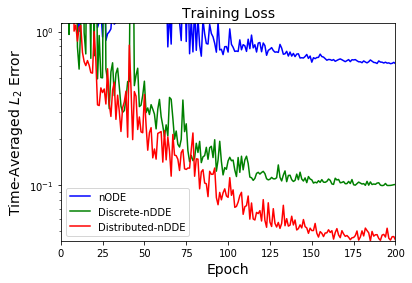

In [12]:
loss_plot_obj = loss_plot(save_dir)

for i in range(len(model_dirs)):
    loss_plot_obj.add_plot_loss(model_dirs[i], legend_names[i])

plt.show()

In [13]:
loss_plot_obj.save_plot('train_loss')

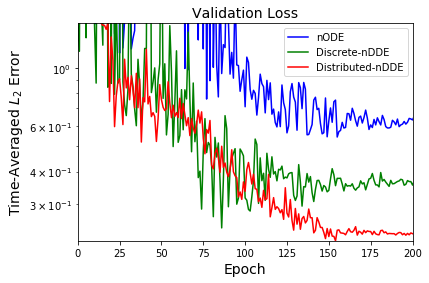

In [14]:
val_loss_plot_obj = val_loss_plot(save_dir)

for i in range(len(model_dirs)):
    val_loss_plot_obj.add_plot_loss(model_dirs[i], legend_names[i])

plt.show()

In [15]:
val_loss_plot_obj.save_plot('val_loss')

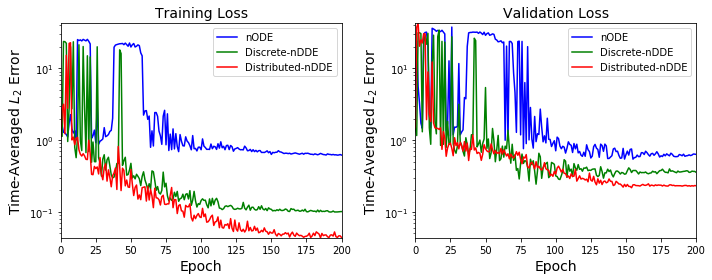

In [16]:
loss_plot_obj = loss_plots(save_dir)

for i in range(len(model_dirs)):
    loss_plot_obj.add_plot_loss(model_dirs[i], legend_names[i])

plt.tight_layout()
plt.show()